In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scikit_posthocs as sp


from scipy import stats


from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


In [164]:
df = pd.read_csv("dataset_23_cmc.csv")
df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [166]:
target = "Contraceptive_method_used"

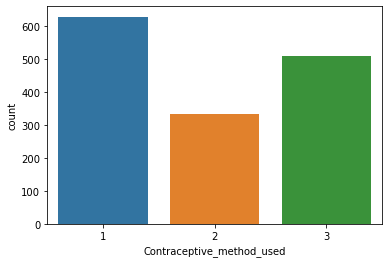

In [167]:
sns.countplot(x = df[target]);


**Balanceamento**

In [168]:
#sample_max = df[df[target] == 2].shape[0]
#df_aux = pd.DataFrame()
#df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==2)].sample(n=sample_max, random_state = 1).index]])
#df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==1)].sample(n=sample_max, random_state = 1).index]])
#df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==3)].sample(n=sample_max, random_state = 1).index]])
#df = df_aux

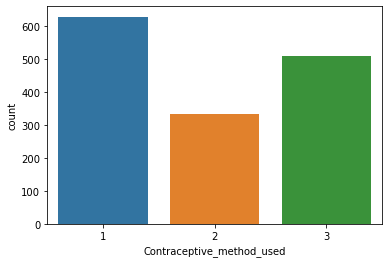

In [169]:
sns.countplot(x = df[target]);

In [170]:
#normalized_df = df

**Normalização entre 0 - 1**

In [171]:
#normlizando 0 - 1
normalized_df = pd.DataFrame()
for i in df.columns:
    if i != target:
        normalized_df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
    else:
        normalized_df[i] = df[i]
        
normalized_df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,0.242424,0.333333,0.666667,0.1875,1.0,1.0,0.333333,0.666667,0.0,1
1,0.878788,0.000000,0.666667,0.6250,1.0,1.0,0.666667,1.000000,0.0,1
2,0.818182,0.333333,0.666667,0.4375,1.0,1.0,0.666667,1.000000,0.0,1
3,0.787879,0.666667,0.333333,0.5625,1.0,1.0,0.666667,0.666667,0.0,1
4,0.606061,0.666667,0.666667,0.5000,1.0,1.0,0.666667,0.333333,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1468,0.515152,1.000000,1.000000,0.1250,1.0,0.0,0.333333,1.000000,0.0,3
1469,0.515152,1.000000,1.000000,0.1875,1.0,1.0,0.000000,1.000000,0.0,3
1470,0.696970,0.666667,0.666667,0.5000,1.0,0.0,0.000000,1.000000,0.0,3
1471,0.515152,0.666667,0.666667,0.2500,1.0,0.0,0.333333,0.333333,0.0,3


**EXPERIMENTO**

In [186]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    
    if type(model).__name__ in ["SVC"] :
        y_t = label_binarize(y_train, classes=[1, 2, 3])
        y_te = label_binarize(y_test, classes=[1, 2,3])
        n_classes = y_t.shape[1]

        classifier = OneVsRestClassifier(model)

        aucs =[]
        y_score = classifier.fit(X_train, y_t).decision_function(X_test)
        for i in range(n_classes):
            fpr, tpr, AUC = roc_curve(y_te[:, i], y_score[:, i])
            aucs.append(auc(fpr,tpr))
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)
        aucs =[roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'),
              roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'),
              roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')]

    
    
    new_row = {"ACC":accuracy_score(y_test, model.predict(X_test)),
               "F1":f1_score(y_test, model.predict(X_test), average='weighted'),
                  "AUC 1_T":aucs[0] ,
                  "AUC 2_T": aucs[1],
                  "AUC 3_T": aucs[2]}

    matrix_confusao = confusion_matrix(y_test,model.predict(X_test))



    return (new_row, matrix_confusao)

#Mudar para plotar a matriz de confusão média
def plotMatrizConfusao(matriz_list):
    sum = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(matriz_list)):
        sum = sum + matriz_list[i]
        
            
    sns.heatmap(sum/len(matriz_list), annot=True)
    

In [190]:
def otimizadorDeHype(name,X_train,y_train):
    cv = 3
    if name=='knn':
        limite_superior = 100
        limite_inferior = 1 
        limite = list(range(limite_inferior,limite_superior))
        #Parametros a serem escolhidos
        params = {'n_neighbors':limite, 'metric':['euclidean','manhattan']}
        #istanciando 
        gridS = GridSearchCV(KNeighborsClassifier(),params,cv=cv,n_jobs=-1,scoring='accuracy')
        #treinando o grid 
        grid_result = gridS.fit(X_train,y_train)
        return KNeighborsClassifier(metric = grid_result.best_params_['metric'],
                                    n_neighbors = grid_result.best_params_['n_neighbors']  )
    
    if name== 'mlp':
        mlp = MLPClassifier(max_iter=1000)

        params = {
            'hidden_layer_sizes': [(8,8),(316,16),(32,32), (32,64), (64,128)],
            'activation': ['tanh', 'relu'],
            'solver':['sgd','adam'],
            'alpha':[0.0001, 0.05],
            'learning_rate': ['constante','adaptive'],
        }

        gridS = GridSearchCV(mlp,params,n_jobs=-1,cv=cv,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return MLPClassifier(hidden_layer_sizes=grid_result.best_params_['hidden_layer_sizes'], 
                    activation=grid_result.best_params_['activation'], solver=grid_result.best_params_['solver'],
                    alpha=grid_result.best_params_['alpha'],
                    learning_rate=grid_result.best_params_['learning_rate'], max_iter=100000)
    if name == 'df':
        
        df = DecisionTreeClassifier()
        params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 10)),
                  'max_depth':list(range(2, 15)),'criterion':["gini", "entropy"]}
        
        gridS = GridSearchCV(df,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return DecisionTreeClassifier(max_leaf_nodes = grid_result.best_params_['max_leaf_nodes'],
                                      min_samples_split=grid_result.best_params_['min_samples_split'] ,
                                     max_depth=  grid_result.best_params_['max_depth'],
                                     criterion = grid_result.best_params_['criterion'])
    if name == "nb":
        
        nb = GaussianNB()
        
        params = {'var_smoothing': np.logspace(0,-9, num=100)}
        
        gridS = GridSearchCV(nb,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return GaussianNB(var_smoothing=grid_result.best_params_['var_smoothing'])
    
    if name == "reg":
        
        reg = LogisticRegression(solver='liblinear')
        
        params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
        
        gridS = GridSearchCV(reg,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        
        return LogisticRegression(solver='liblinear', penalty=grid_result.best_params_['penalty'])
    if name == "svm":
        
        svm = SVC()
        
        params = {"kernel": ['rbf'], 'C': list(range(1, 100))}
        
        gridS = GridSearchCV(svm ,params,cv=cv,n_jobs=-1,scoring='accuracy')
                                                                                       
        grid_result = gridS.fit(X_train,y_train)
        return SVC(kernel=grid_result.best_params_['kernel'], C=grid_result.best_params_['C'])

In [191]:
X = normalized_df.drop(target, axis=1).values
y = normalized_df[target].values
splits_kfold = 10

In [192]:

kf = StratifiedKFold(n_splits=splits_kfold)
kf.get_n_splits(X,y)

metrics = ["ACC","F1","AUC 1_T","AUC 2_T","AUC 3_T"]


matriz_knn = []
matriz_tree = []
matriz_mlp = []
matriz_nb = []
matriz_reg_log = []
matriz_svm = []

df_knn = pd.DataFrame(columns=metrics)
df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_nb = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)
df_svm = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    
    
    
    model = otimizadorDeHype("knn",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_knn = df_knn.append(line, ignore_index=True)
    matriz_knn.append(matrix)
    
     
        
    model = otimizadorDeHype("df",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_tree = df_tree.append(line, ignore_index=True)
    matriz_tree.append(matrix)   
    
    
    
    model = otimizadorDeHype("mlp",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_mlp = df_mlp.append(line, ignore_index=True)
    matriz_mlp.append(matrix)  
    
    
    model = otimizadorDeHype("nb",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_nb = df_nb.append(line, ignore_index=True)
    matriz_nb.append(matrix) 
    
    
    model = otimizadorDeHype("reg",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_reg_log = df_reg_log.append(line, ignore_index=True)
    matriz_reg_log.append(matrix)
    
    model = otimizadorDeHype("svm",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_svm = df_svm.append(line, ignore_index=True)
    matriz_svm.append(matrix)
    
    

## Resultados

**Acurácia Geral**

In [198]:
df_result = pd.DataFrame()
metrica = "ACC"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.501066,0.460310,0.549890,0.551976,0.507800,0.531600
std,0.047610,0.038887,0.035188,0.031087,0.029341,0.021548
min,0.432432,0.385135,0.510204,0.486486,0.455782,0.500000
25%,0.460275,0.433673,0.531405,0.534692,0.497449,0.518707
50%,0.503401,0.467802,0.538978,0.557823,0.508457,0.534014
75%,0.543126,0.487279,0.549320,0.577255,0.528027,0.546527
max,0.557823,0.517007,0.632653,0.585034,0.544218,0.564626


**F1-Score Geral**

In [199]:
df_result = pd.DataFrame()
metrica = "F1"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.498426,0.459060,0.544534,0.546907,0.497433,0.527287
std,0.044993,0.036814,0.039274,0.029565,0.031311,0.023388
min,0.435822,0.392321,0.486893,0.496519,0.447497,0.485984
25%,0.459747,0.436406,0.528174,0.523381,0.477755,0.510397
50%,0.500789,0.462068,0.538377,0.549968,0.493279,0.532897
75%,0.541319,0.489088,0.542923,0.569605,0.521853,0.538371
max,0.553529,0.510943,0.634795,0.581488,0.542478,0.566479


**AUC Classe 1 contra Todo**

In [200]:
df_result = pd.DataFrame()
metrica = "AUC 1_T"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.682595,0.662633,0.736386,0.708793,0.700002,0.736670
std,0.024570,0.024231,0.022903,0.025912,0.031696,0.042227
min,0.637432,0.626326,0.704668,0.669533,0.638114,0.681500
25%,0.672371,0.649094,0.721943,0.690442,0.690314,0.701924
50%,0.687305,0.658793,0.732766,0.707762,0.697823,0.733453
75%,0.700344,0.684587,0.741855,0.728157,0.725084,0.752768
max,0.711948,0.696508,0.781124,0.754082,0.739430,0.803735


**AUC Classe 2 contra Todo**

In [201]:
df_result = pd.DataFrame()
metrica = "AUC 2_T"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.682595,0.662633,0.736386,0.708793,0.700002,0.680420
std,0.024570,0.024231,0.022903,0.025912,0.031696,0.040510
min,0.637432,0.626326,0.704668,0.669533,0.638114,0.630250
25%,0.672371,0.649094,0.721943,0.690442,0.690314,0.652338
50%,0.687305,0.658793,0.732766,0.707762,0.697823,0.677153
75%,0.700344,0.684587,0.741855,0.728157,0.725084,0.693698
max,0.711948,0.696508,0.781124,0.754082,0.739430,0.752259


**AUC Classe 3 contra Todo**

In [202]:
df_result = pd.DataFrame()
metrica = "AUC 3_T"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.682595,0.662633,0.736386,0.708793,0.700002,0.681840
std,0.024570,0.024231,0.022903,0.025912,0.031696,0.049001
min,0.637432,0.626326,0.704668,0.669533,0.638114,0.624592
25%,0.672371,0.649094,0.721943,0.690442,0.690314,0.657050
50%,0.687305,0.658793,0.732766,0.707762,0.697823,0.666304
75%,0.700344,0.684587,0.741855,0.728157,0.725084,0.684021
max,0.711948,0.696508,0.781124,0.754082,0.739430,0.770016


**KNN Resultados**

Plot das matrizes de confusão

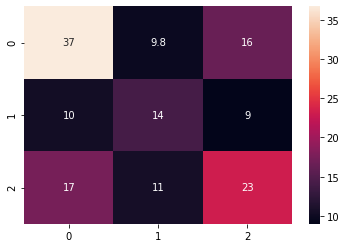

In [203]:
plotMatrizConfusao(matriz_knn)

**DT Resutaldos**

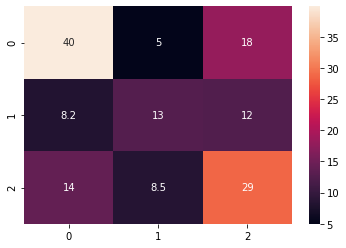

In [204]:
plotMatrizConfusao(matriz_tree)

**Multilayer Perceptron Resultados**

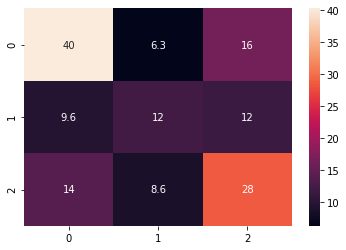

In [205]:
plotMatrizConfusao(matriz_mlp)

**Naive Bayes Resultados**

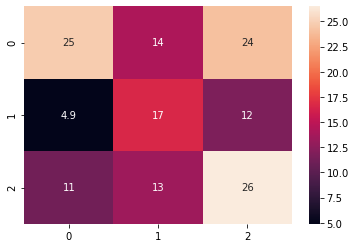

In [206]:
plotMatrizConfusao(matriz_nb)

**Regressão Logistica Resutaldos**

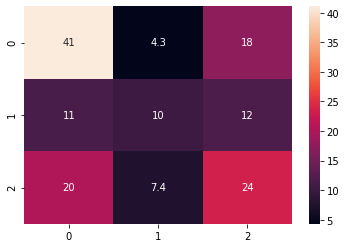

In [207]:
plotMatrizConfusao(matriz_reg_log)

**SVM**

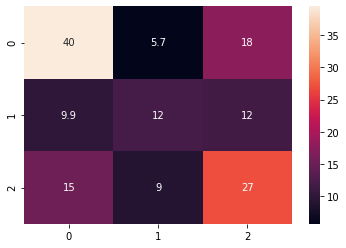

In [208]:
plotMatrizConfusao(matriz_svm)

## Teste estatisticos

**Shapiro-Wilk**

In [227]:
print("Teste de normalidade para as amostra das acurácias")
metrica = "ACC"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra das acurácias
0.3197598159313202
0.82821124792099
0.017845693975687027
0.12150559574365616
0.6023426055908203
0.7127705216407776


In [210]:
print("Teste de normalidade para as amostra dos F1-score")
metrica = "F1"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra dos F1-score
0.28937554359436035
0.9333374500274658
0.07881451398134232
0.27594178915023804
0.7954959869384766
0.9503359794616699


In [211]:
print("Teste de normalidade para as amostra da AUC da classe 1 contra todos")
metrica = "AUC 1_T"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra da AUC da classe 1 contra todos
0.45864614844322205
0.4883570075035095
0.4049275517463684
0.9828658103942871
0.39504700899124146
0.40827757120132446


In [212]:
print("Teste de normalidade para as amostra da AUC da classe 2 contra todos")
metrica = "AUC 2_T"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra da AUC da classe 2 contra todos
0.45864614844322205
0.4883570075035095
0.4049275517463684
0.9828658103942871
0.39504700899124146
0.45581749081611633


In [213]:
print("Teste de normalidade para as amostra da AUC da classe 3 contra todos")
metrica = "AUC 3_T"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra da AUC da classe 3 contra todos
0.45864614844322205
0.4883570075035095
0.4049275517463684
0.9828658103942871
0.39504700899124146
0.028713408857584


**Teste Estátistico kruskal**

In [214]:
print("Valores de p para acuracia ")
print(stats.kruskal(df_knn["ACC"], df_nb["ACC"],df_mlp["ACC"],df_tree["ACC"],df_reg_log["ACC"],df_svm["ACC"]))

Valores de p para acuracia 
KruskalResult(statistic=27.175717746651422, pvalue=5.271909126423895e-05)


In [215]:
print("Valores de p para F1 ")
print(stats.kruskal(df_knn["F1"], df_nb["F1"],df_mlp["F1"],df_tree["F1"],df_reg_log["F1"],df_svm["F1"]))

Valores de p para F1 
KruskalResult(statistic=25.946229508196723, pvalue=9.140438025572308e-05)


In [216]:
print("Valores de p para AUC 1 contra todos ")
print(stats.kruskal(df_knn["AUC 1_T"], df_nb["AUC 1_T"],df_mlp["AUC 1_T"],
                    df_tree["AUC 1_T"],df_reg_log["AUC 1_T"],df_svm["AUC 1_T"]))

Valores de p para AUC 1 contra todos 
KruskalResult(statistic=30.00196721311474, pvalue=1.4735437489076359e-05)


In [217]:
print("Valores de p para AUC 2 contra todos ")
print(stats.kruskal(df_knn["AUC 2_T"], df_nb["AUC 2_T"],df_mlp["AUC 2_T"],
                    df_tree["AUC 2_T"],df_reg_log["AUC 2_T"],df_svm["AUC 2_T"]))

Valores de p para AUC 2 contra todos 
KruskalResult(statistic=26.102950819672145, pvalue=8.522548616990644e-05)


In [218]:
print("Valores de p para AUC 3 contra todos ")
print(stats.kruskal(df_knn["AUC 3_T"], df_nb["AUC 3_T"],df_mlp["AUC 3_T"],
                    df_tree["AUC 3_T"],df_reg_log["AUC 3_T"],df_svm["AUC 3_T"]))

Valores de p para AUC 3 contra todos 
KruskalResult(statistic=25.872131147540983, pvalue=9.447828280723915e-05)


**Teste Estátistico Dunn's**

In [219]:
print("Valores de p para acurácia: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["ACC"], df_nb["ACC"],df_mlp["ACC"],df_tree["ACC"],df_reg_log["ACC"],df_svm["ACC"]] , p_adjust = 'bonferroni')


Valores de p para acurácia: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,0.793967,0.516537,0.196942,1.000000,1.000000
2,0.793967,1.000000,0.000767,0.000151,0.817833,0.013205
3,0.516537,0.000767,1.000000,1.000000,0.500369,1.000000
4,0.196942,0.000151,1.000000,1.000000,0.189974,1.000000
5,1.000000,0.817833,0.500369,0.189974,1.000000,1.000000
6,1.000000,0.013205,1.000000,1.000000,1.000000,1.000000


In [220]:
print("Valores de p para F1: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["F1"], df_nb["F1"],df_mlp["F1"],df_tree["F1"],df_reg_log["F1"],df_svm["F1"]], p_adjust = 'bonferroni')

Valores de p para F1: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,0.871494,0.570915,0.307174,1.000000,1.000000
2,0.871494,1.000000,0.001082,0.000379,1.000000,0.023462
3,0.570915,0.001082,1.000000,1.000000,0.258644,1.000000
4,0.307174,0.000379,1.000000,1.000000,0.130067,1.000000
5,1.000000,1.000000,0.258644,0.130067,1.000000,1.000000
6,1.000000,0.023462,1.000000,1.000000,1.000000,1.000000


In [224]:
print("Valores de p para AUC 1 contra TODOS: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["AUC 1_T"], df_nb["AUC 1_T"],df_mlp["AUC 1_T"],
                 df_tree["AUC 1_T"],df_reg_log["AUC 1_T"],df_svm["AUC 1_T"]], p_adjust = 'bonferroni')

Valores de p para AUC 1 contra TODOS: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,1.000000,0.008592,1.000000,1.000000,0.054836
2,1.000000,1.000000,0.000064,0.075708,0.267774,0.000740
3,0.008592,0.000064,1.000000,1.000000,0.388366,1.000000
4,1.000000,0.075708,1.000000,1.000000,1.000000,1.000000
5,1.000000,0.267774,0.388366,1.000000,1.000000,1.000000
6,0.054836,0.000740,1.000000,1.000000,1.000000,1.000000


In [225]:
print("Valores de p para AUC 2 contra TODOS:: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["AUC 2_T"], df_nb["AUC 2_T"],df_mlp["AUC 2_T"],
                 df_tree["AUC 2_T"],df_reg_log["AUC 2_T"],df_svm["AUC 2_T"]], p_adjust = 'bonferroni')

Valores de p para AUC 2 contra TODOS:: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,1.000000,0.014999,1.000000,1.000000,1.000000
2,1.000000,1.000000,0.000064,0.061956,0.209390,1.000000
3,0.014999,0.000064,1.000000,1.000000,0.487488,0.006144
4,1.000000,0.061956,1.000000,1.000000,1.000000,1.000000
5,1.000000,0.209390,0.487488,1.000000,1.000000,1.000000
6,1.000000,1.000000,0.006144,1.000000,1.000000,1.000000


In [226]:
print("Valores de p para AUC 3 contra TODOS:: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["AUC 3_T"], df_nb["AUC 3_T"],df_mlp["AUC 3_T"],
                 df_tree["AUC 3_T"],df_reg_log["AUC 3_T"],df_svm["AUC 3_T"]], p_adjust = 'bonferroni')

Valores de p para AUC 3 contra TODOS:: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.00000,1.000000,0.021480,1.000000,1.000000,1.000000
2,1.00000,1.000000,0.000093,0.057122,0.209390,1.000000
3,0.02148,0.000093,1.000000,1.000000,0.588982,0.005056
4,1.00000,0.057122,1.000000,1.000000,1.000000,0.751755
5,1.00000,0.209390,0.588982,1.000000,1.000000,1.000000
6,1.00000,1.000000,0.005056,0.751755,1.000000,1.000000
